# **Consumer Shopping Trends Analysis**

## Aim :
Analyze consumer shopping patterns to identify high-value customer segments, uncover popular product categories, and predict customer retention to support data-driven decision-making in the retail sector.

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv')

In [3]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
data.shape

(3900, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

## Missing value Check

In [6]:
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## EDA

**Demographic Analysis**

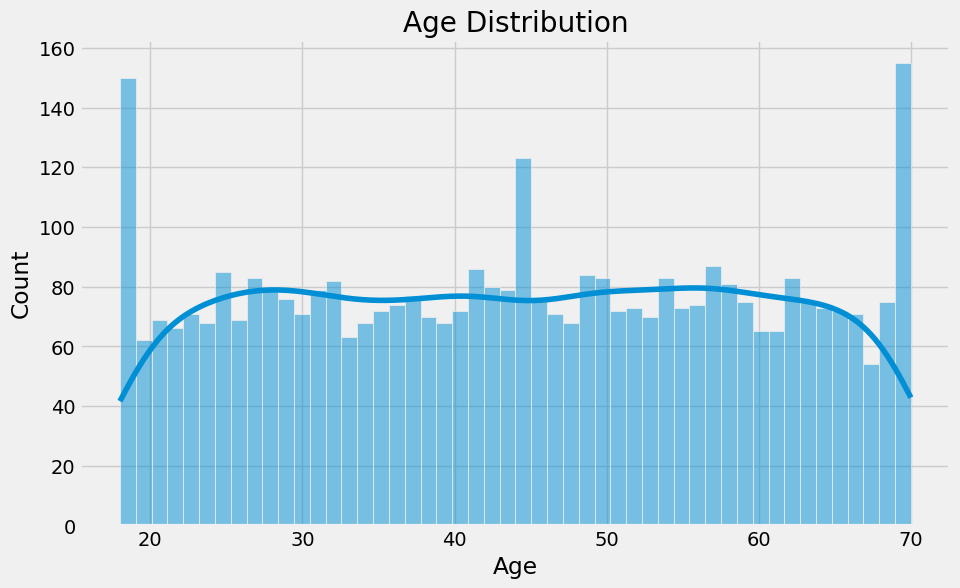

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde = True, bins=50)
plt.title('Age Distribution')
plt.show()

- Age is somewhat uniformly distributed

**Gender Distribution**

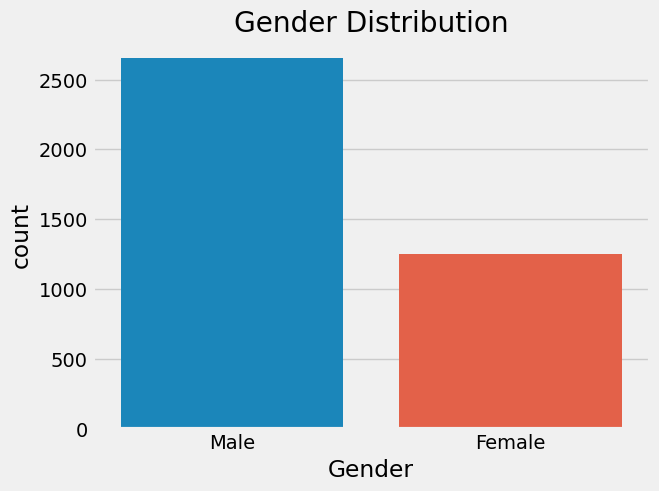

In [10]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

- The no of Male are almost twice the no of female for the purchases

**Shopping Behavior Analysis**

**Top Product Categories**

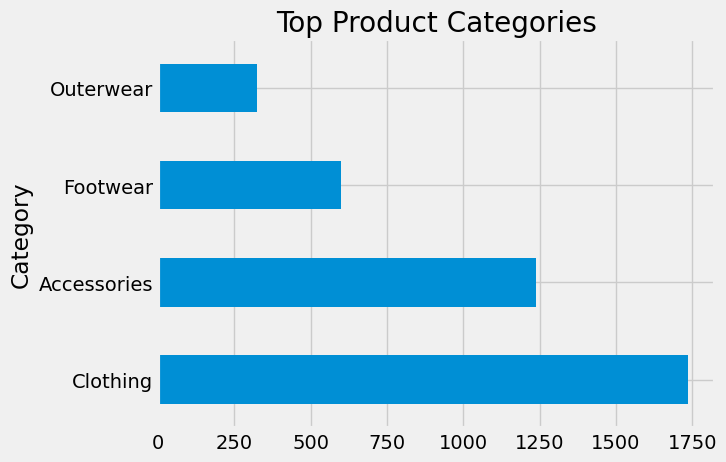

In [11]:
top_categories = data['Category'].value_counts()
top_categories.plot(kind='barh')
plt.title('Top Product Categories')
plt.show()

- CLothing is the most Sold category followed by Accesories and Footwear

**Average Purchase amount by Category**

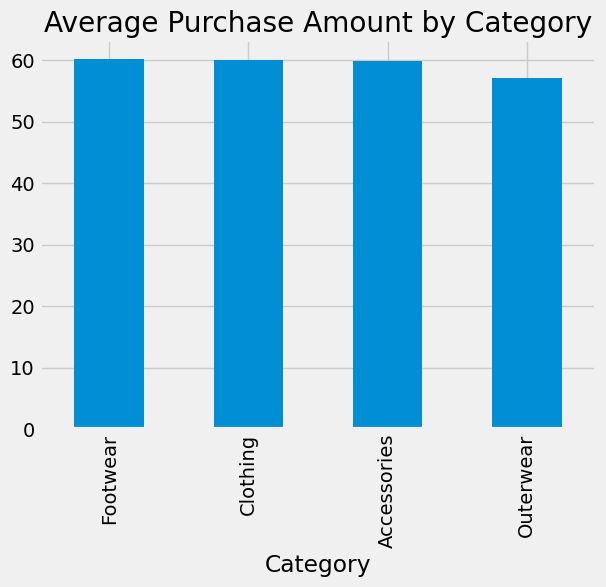

In [12]:
avg_purchase_category = data.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
avg_purchase_category.plot(kind='bar')
plt.title('Average Purchase Amount by Category')
plt.show()

- Except Outerwear all the Categories has $ 60 Avg Purchase amount
  
- for Outwear its slightly less at $ 55

**Seasonal Trends**

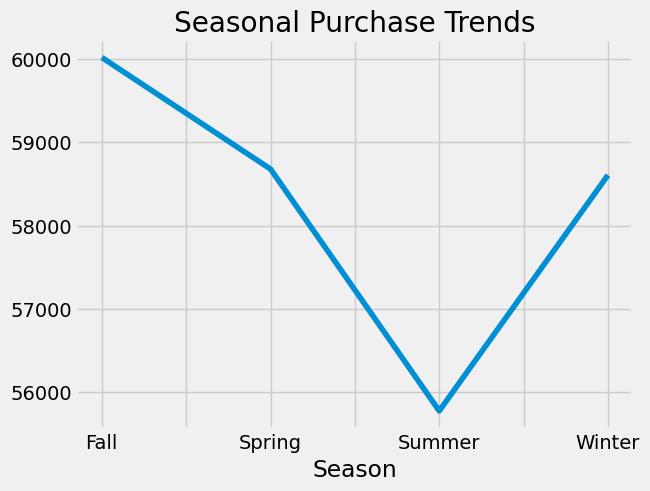

In [13]:
seasonal_trends = data.groupby('Season')['Purchase Amount (USD)'].sum()
seasonal_trends.plot(kind='line')
plt.title('Seasonal Purchase Trends')
plt.show()

- Considering total Sales we can observe The Peak season is at Fall and in summer it dips to the lowest and from there it gradually again increases in winter

## Relationship among variables

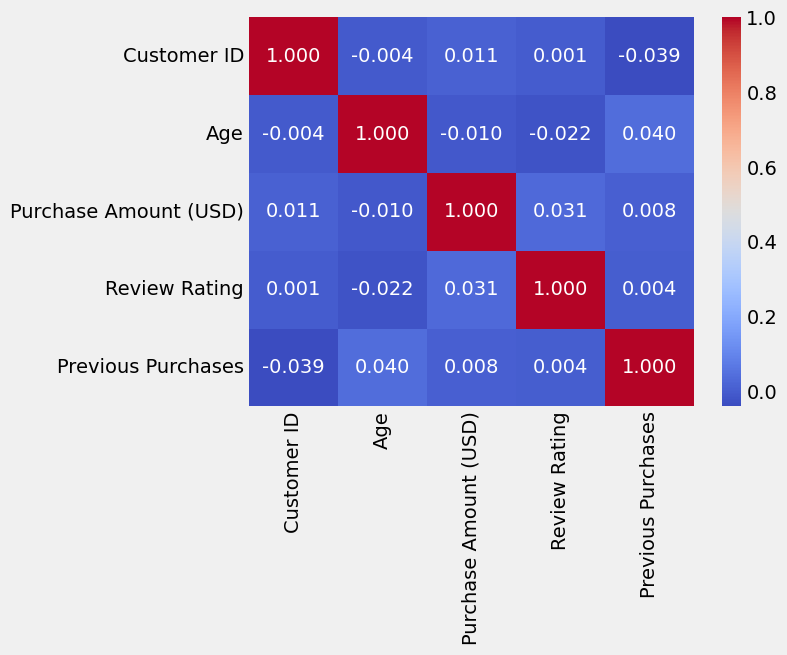

In [14]:
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'coolwarm', fmt = '.3f')
plt.show()

- We dont any Strong Positive or Negative correlation in the data

## Distribution of  Numerical Columns

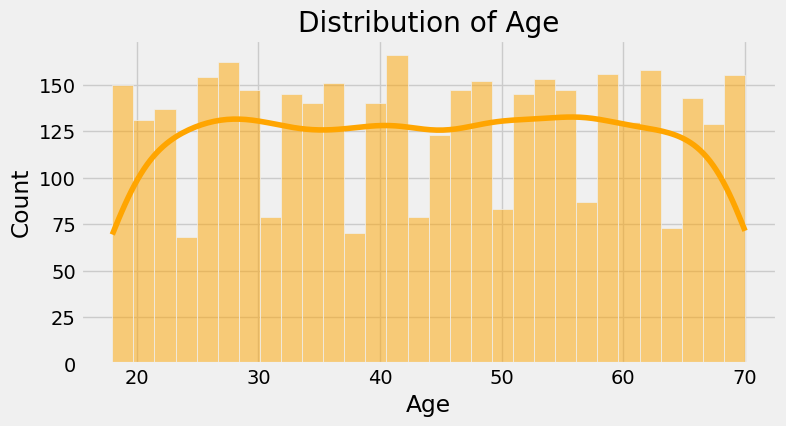

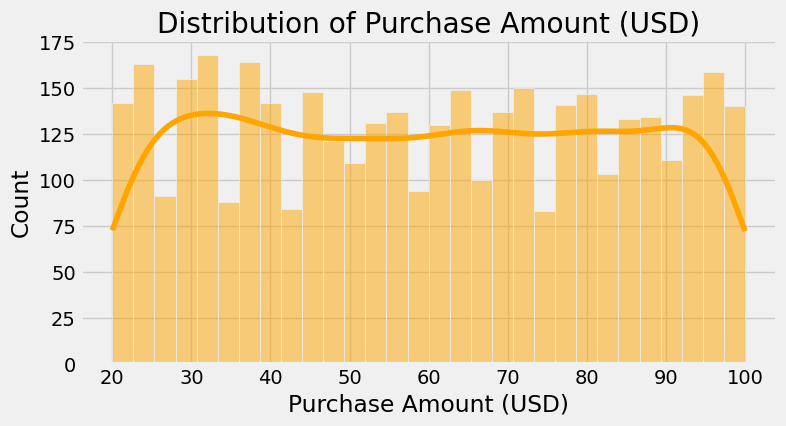

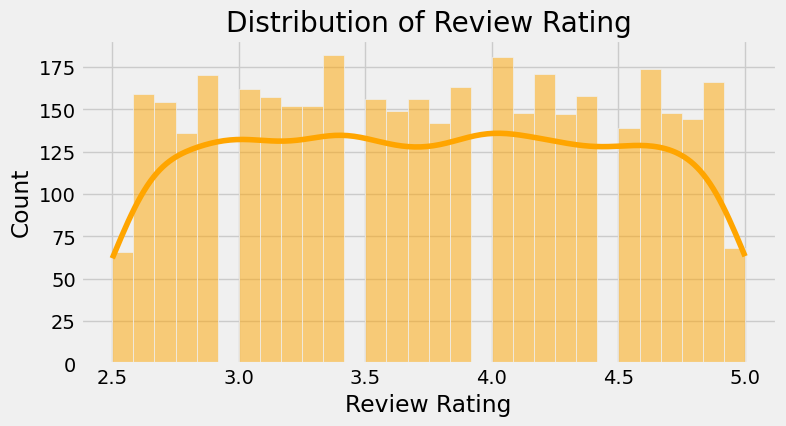

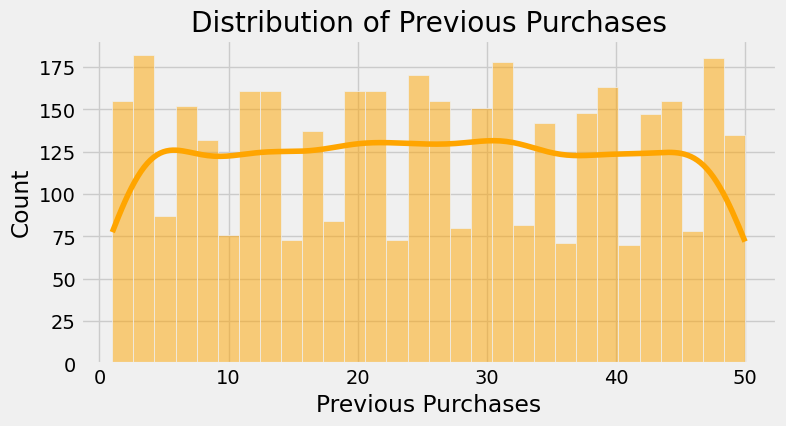

In [15]:

numerical_features = ['Age', 'Purchase Amount (USD)',  'Review Rating', 'Previous Purchases']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color = 'orange')
    plt.title(f'Distribution of {feature}')
    plt.show()


## Purchase Behaviour by Age group

           Purchase Amount (USD)
Age Group                       
18-25                  60.739044
50-65                  60.281891
<18                    59.985507
25-35                  59.760108
35-50                  59.072007
65+                    58.884507


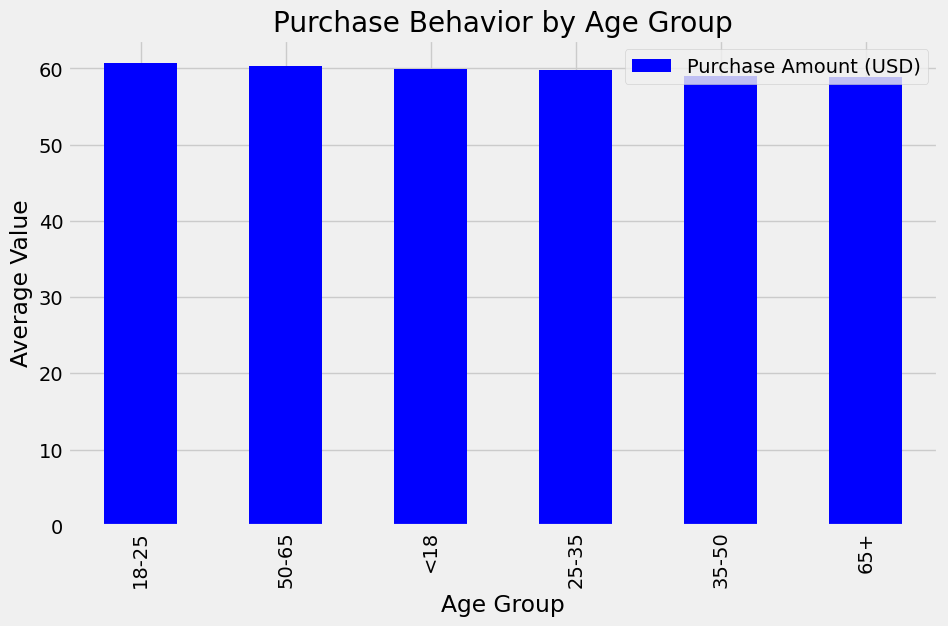

In [16]:
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-25', '25-35', '35-50', '50-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Average purchase amount and frequency by age group
age_group_analysis = data.groupby('Age Group').agg({'Purchase Amount (USD)': 'mean'}).sort_values(by='Purchase Amount (USD)', ascending=False)
print(age_group_analysis)

# Plot results
age_group_analysis.plot(kind='bar', figsize=(10, 6), color = 'blue')
plt.title('Purchase Behavior by Age Group')
plt.ylabel('Average Value')
plt.show()

## Purchasing pattern by Gender

        Purchase Amount (USD)
Gender                       
Female              60.249199
Male                59.536199


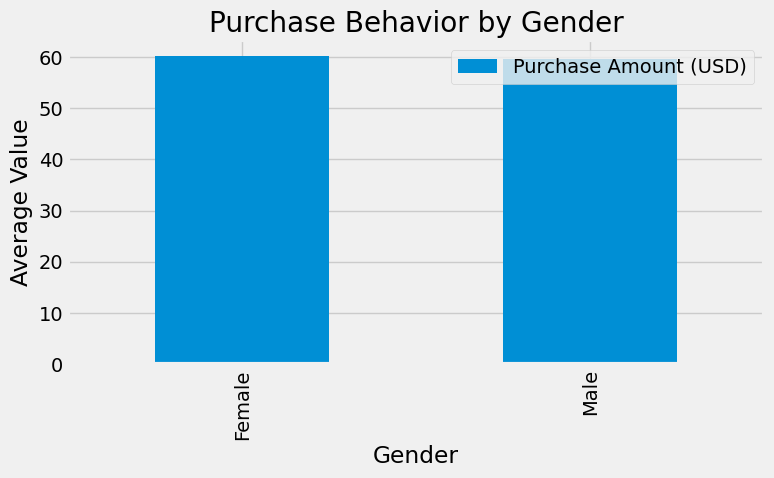

In [17]:
gender_analysis = data.groupby('Gender').agg({'Purchase Amount (USD)': 'mean'})
print(gender_analysis)

# Plot results
gender_analysis.plot(kind='bar', figsize=(8, 4))
plt.title('Purchase Behavior by Gender')
plt.ylabel('Average Value')
plt.show()

## High Value Customers

In [18]:
# Define high-value customers as top 10% based on Total Spend
high_value_threshold = data['Purchase Amount (USD)'].quantile(0.90)

# Filter high-value customers
high_value_customers = data[data['Purchase Amount (USD)'] >= high_value_threshold]

# Summary of high-value customers
print(f"Total High-Value Customers: {len(high_value_customers)}")
print(high_value_customers[['Customer ID', 'Purchase Amount (USD)']].head())

Total High-Value Customers: 407
    Customer ID  Purchase Amount (USD)
8             9                     97
28           29                     94
42           43                    100
54           55                     94
66           67                     94


Top Categories for High-Value Customers:
Category
Clothing       186
Accessories    128
Footwear        62
Outerwear       31
Name: count, dtype: int64


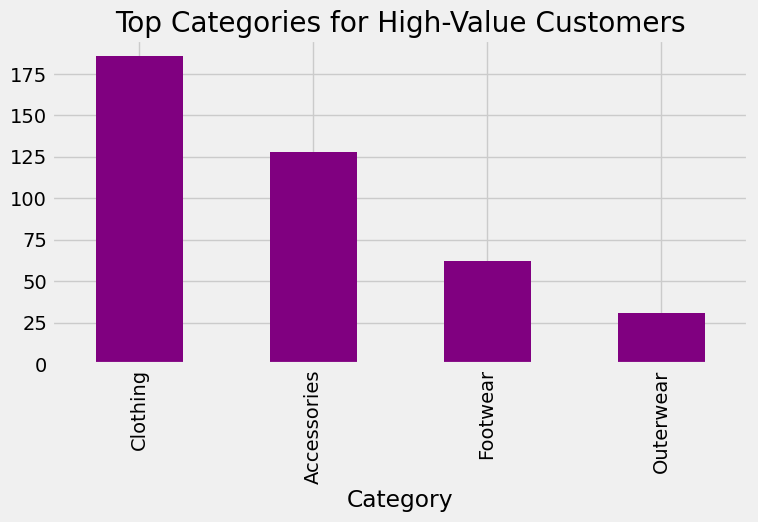

In [19]:
# Most frequent categories among high-value customers
top_categories_high_value = high_value_customers['Category'].value_counts().head(5)
print("Top Categories for High-Value Customers:")
print(top_categories_high_value)

# Plot the top categories
top_categories_high_value.plot(kind='bar', color='purple', figsize=(8, 4))
plt.title('Top Categories for High-Value Customers')
plt.show()

- For High value customers as well Clothing category comes on top

## Impact on Purchase Amount by Discounts

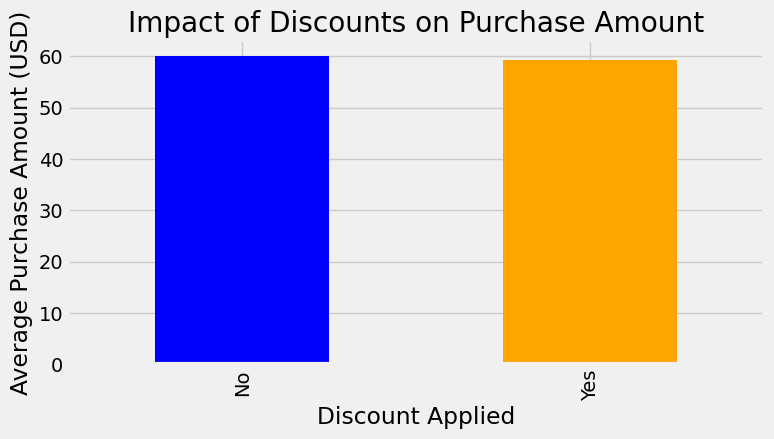

In [20]:
# Compare average purchase amount with and without discounts
discount_analysis = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

# Plot results
discount_analysis.plot(kind='bar', figsize=(8, 4), color=['blue', 'orange'])
plt.title('Impact of Discounts on Purchase Amount')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## Model Building 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Target variable: Subscription Status
X = data[['Age', 'Gender', 'Purchase Amount (USD)', 'Review Rating']]
y = data['Subscription Status'].map({'Yes': 1, 'No': 0})

# Encode categorical features
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Train RandomForest model
clf = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=8,min_samples_leaf=2,random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83       558
           1       0.00      0.00      0.00       222

    accuracy                           0.71       780
   macro avg       0.36      0.50      0.42       780
weighted avg       0.51      0.71      0.60       780

